In this project, we work with a real-world dataset from kaggle https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data and guide you through the complete Machine Learning pipeline — from data exploration to building classification models and enhancing their performance.

🔍 Introduction:
Breast cancer is a serious health issue for many women around the world. Finding it early can help save lives. In this project, we use a real dataset from Kaggle to build machine learning models that can predict if a tumor is benign (not cancer) or malignant (cancer).

🎯 Goal:
The main goal is to test different machine learning models and find out which one gives the best results for predicting breast cancer.

🤖 Models Used:
We trained and compared the following models:

Logistic Regression

Support Vector Machine (SVM)

K-Nearest Neighbors (KNN)

Naive Bayes

Decision Tree

Random Forest

📈 How We Measured Performance
To see how well each model works, we used:

Accuracy – How many predictions were correct

Precision – How many predicted cancers were really cancer

Recall – How many actual cancers were found

F1 Score – A balance between precision and recall

Confusion Matrix – A table showing correct and incorrect results

✅ Result:
After testing all the models, we found which one works best for predicting breast cancer. This shows how machine learning can help doctors make better and faster decisions.



## Import the Packages

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
#importing a csv file
data=pd.read_csv(r"C:\Users\vasav\OneDrive\Documents\breast_cancer.csv")
#View top 5 rows of a dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#Gaining Insight into Dataset Structure 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
l=LabelEncoder()
data['diagnosis']=l.fit_transform(data['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
#Descriptive Statistics of the Dataset
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [14]:
#Summarizing Null Values in the Dataset 
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
#Dropping Columns Containing Null Values
data=data.dropna(axis=1)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


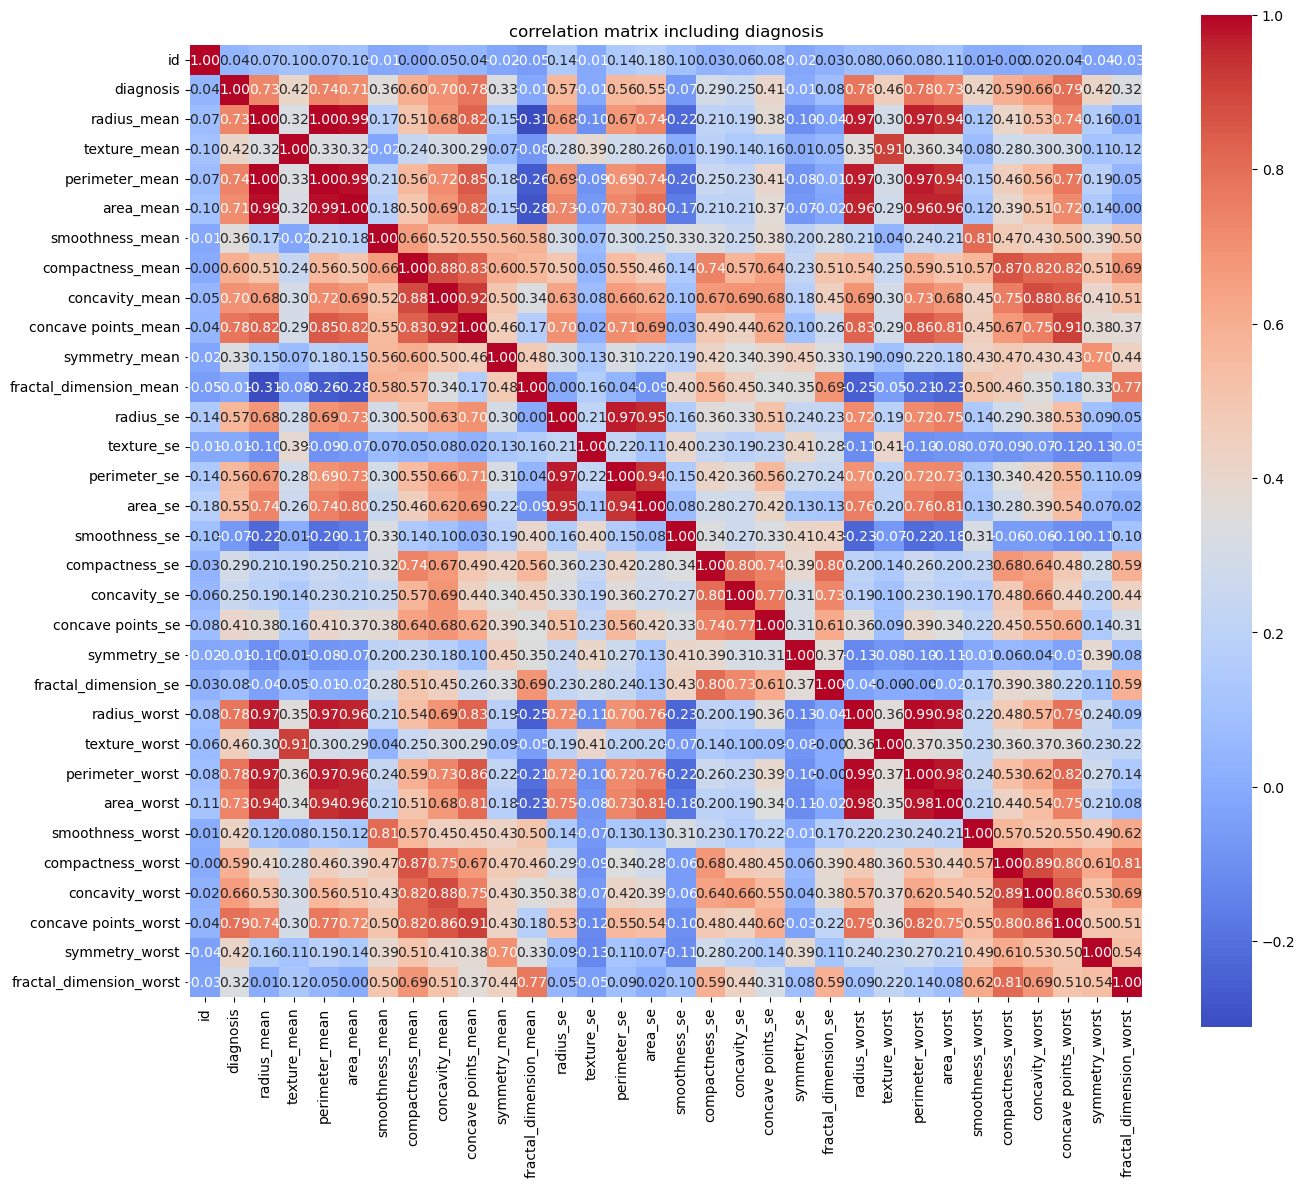

In [18]:
#Computing the Correlation Matrix 
corr_matrix=data.corr()
#Adjusting the Size of the Plot for Better Visualization
plt.figure(figsize=(14,12))
#Draw the heatmap
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,fmt='.2f',square=True)
plt.title("correlation matrix including diagnosis")
plt.tight_layout()
plt.show()

🔍 Inference from the Correlation Heatmap:
The correlation heatmap provides important insights into the relationships between different features in the dataset, particularly in relation to the diagnosis column, which likely indicates whether a tumor is malignant (1) or benign (0).

✅ Key Inferences:
Strong Positive Correlation with Malignancy

The following features have high positive correlation with diagnosis, meaning higher values of these features are associated with malignant tumors:

area_mean,
perimeter_mean,
radius_mean,
concave points_mean,
compactness_mean,
concavity_mean.

Strong Feature Interdependencies:
Several features are highly correlated with each other, especially the _mean, _worst, and _se versions of the same base feature (e.g., radius_mean, radius_worst, radius_se).

📌 Conclusion:
The heatmap reveals that certain features strongly indicate malignancy and may serve as powerful predictors in machine learning models. However, feature selection or dimensionality reduction may be necessary due to high inter-feature correlations.



## splitting the data in to independent and dependent variables in terms of x and y

In [22]:
x=data.iloc[:,2:-1]
y=data.iloc[:,[1]]

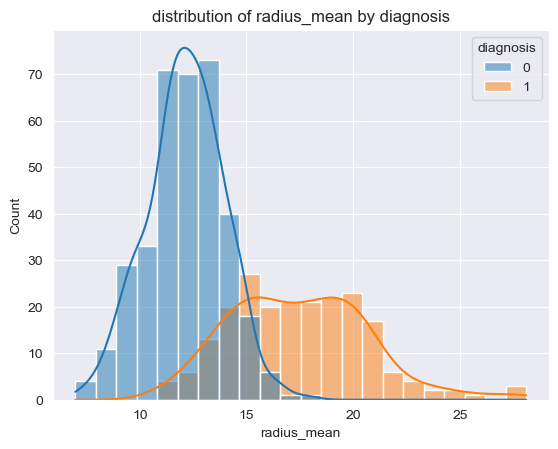

In [24]:
sns.set_style('darkgrid')
sns.histplot(data=data,x='radius_mean',hue='diagnosis',kde=True)
plt.title("distribution of radius_mean by diagnosis")
plt.show()

People without cancer (0) have a lower radius_mean, mostly centered around 10–14.
People with cancer (1) tend to have higher radius_mean values, typically in the range of 15–25.
The count is higher for diagnosis '0', indicating that more people in the dataset are not suffering from cancer

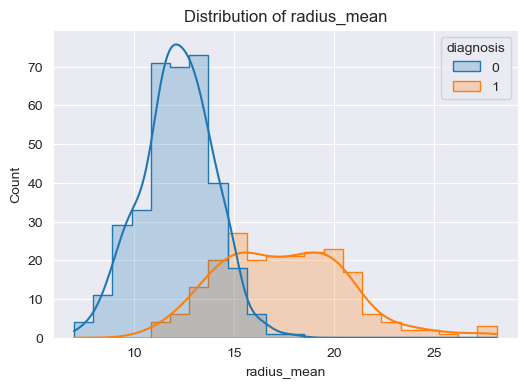

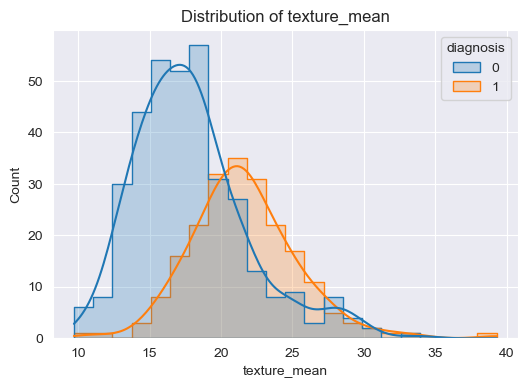

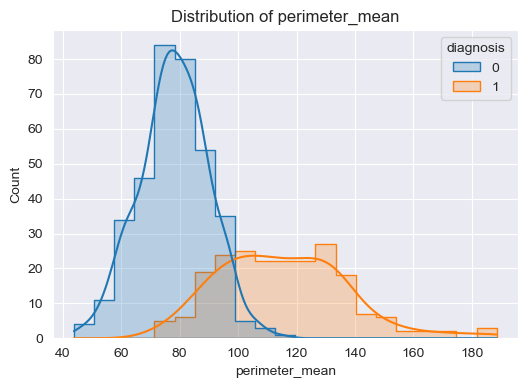

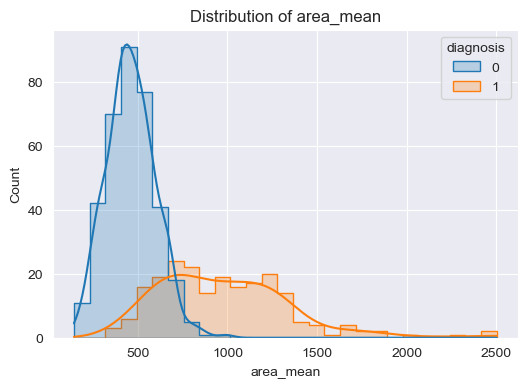

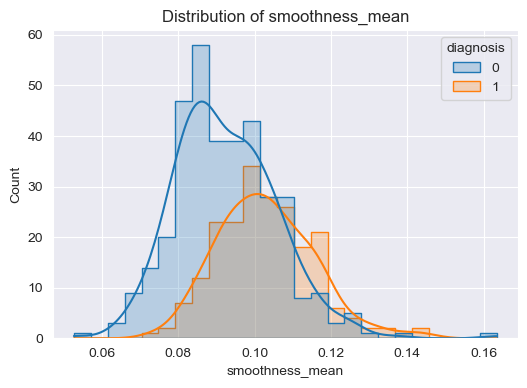

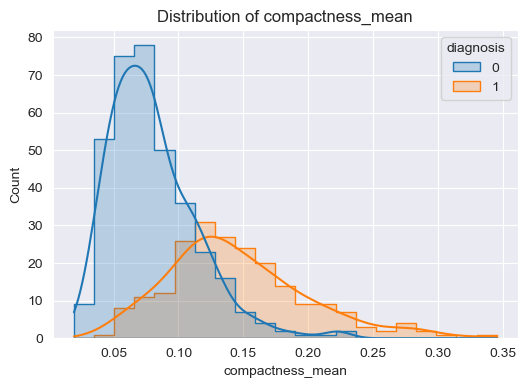

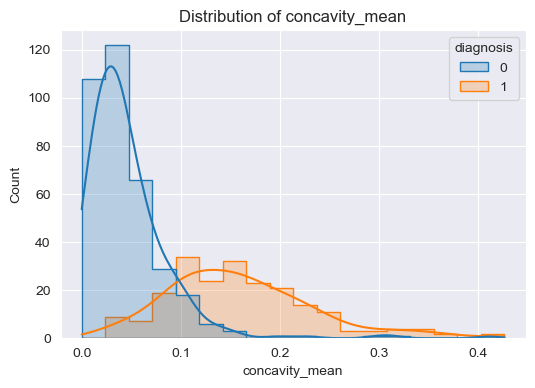

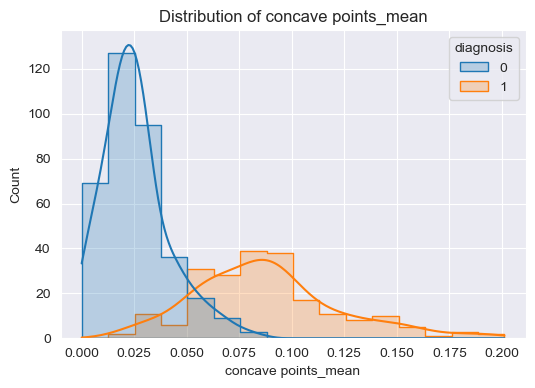

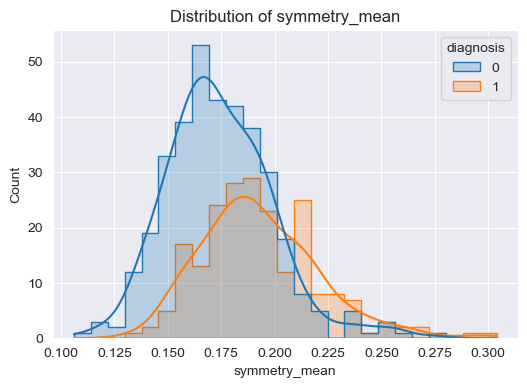

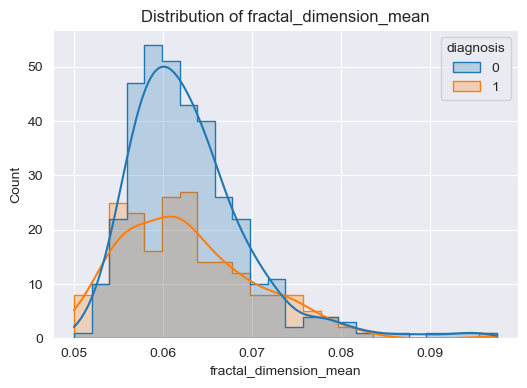

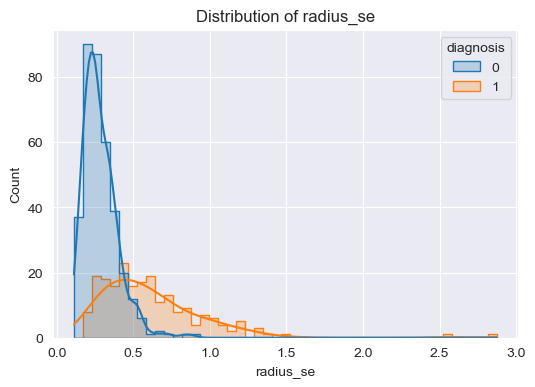

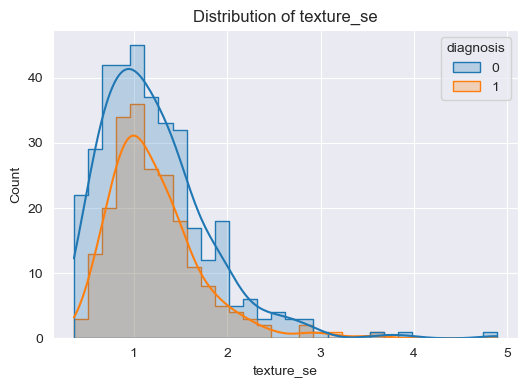

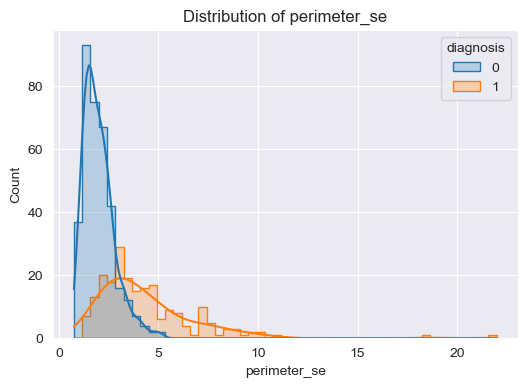

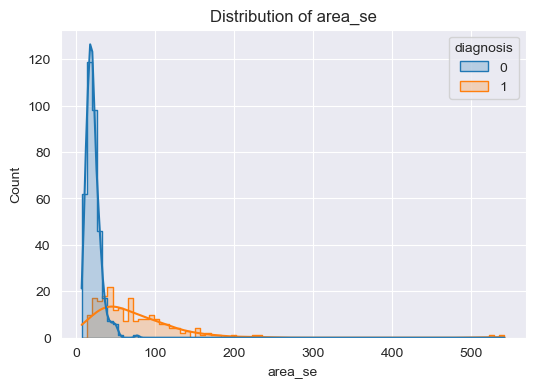

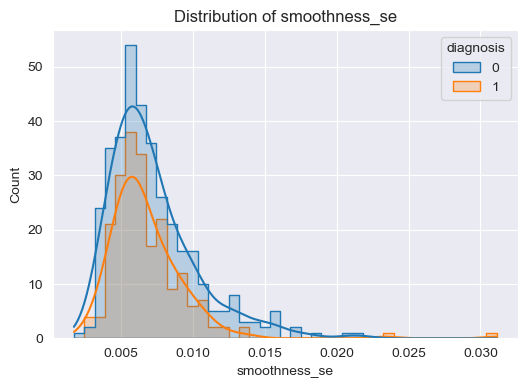

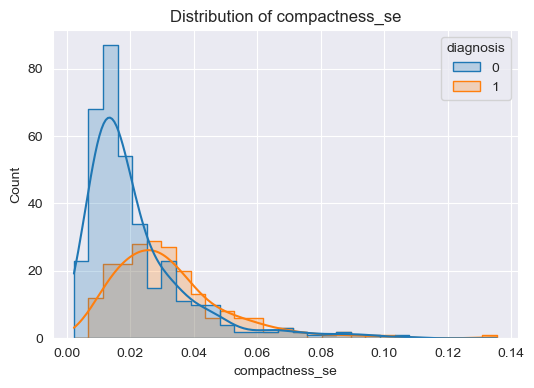

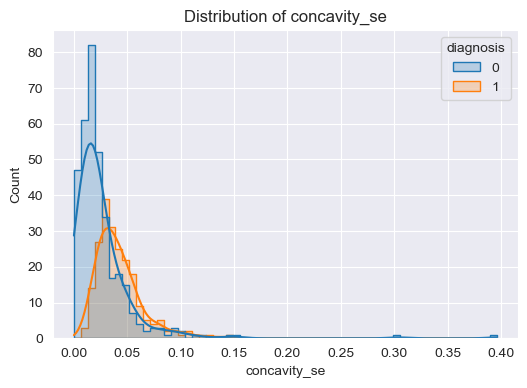

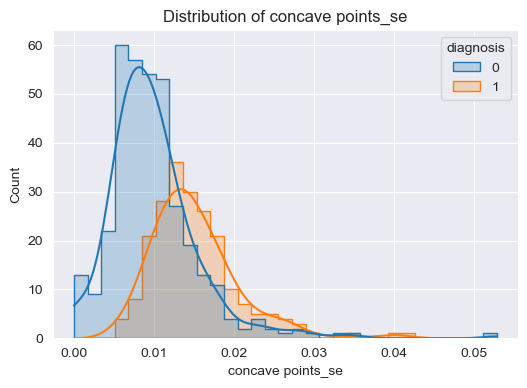

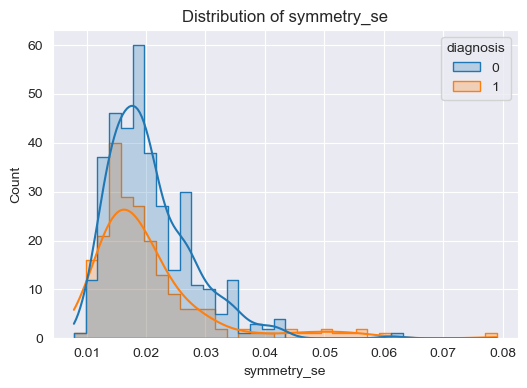

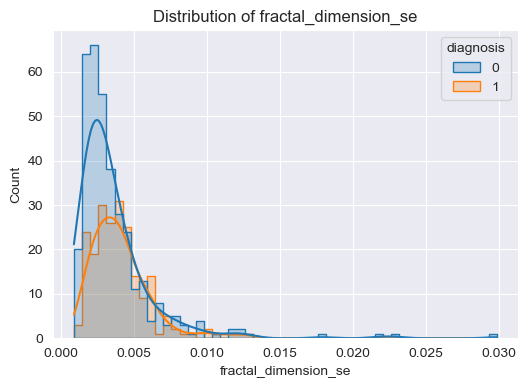

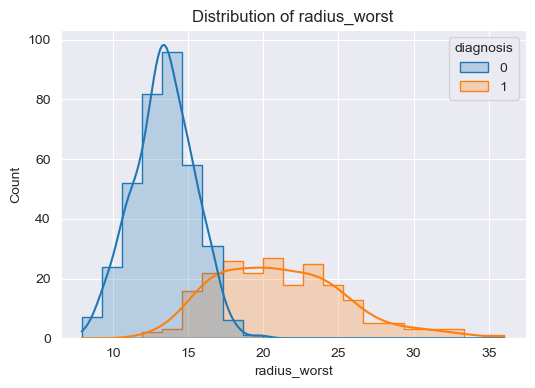

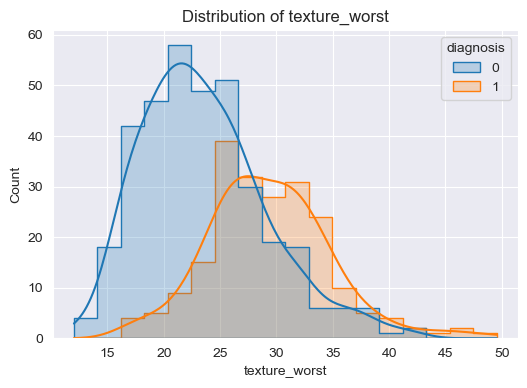

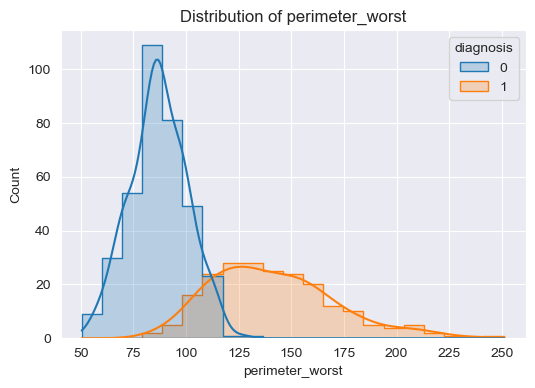

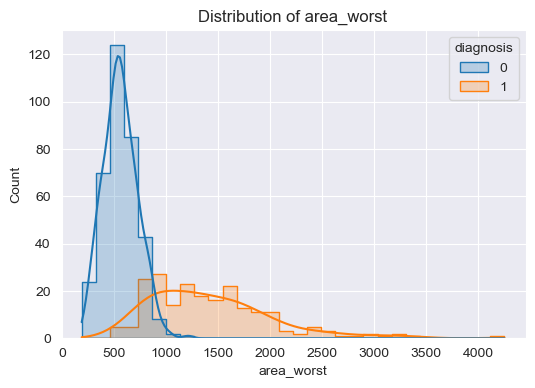

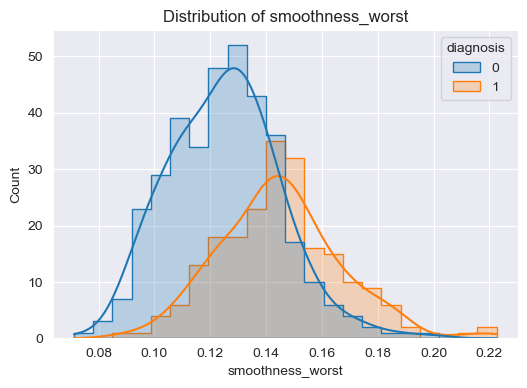

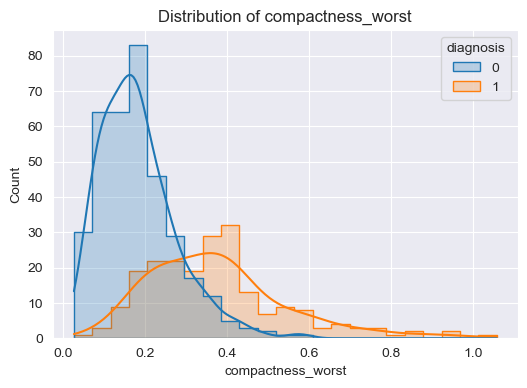

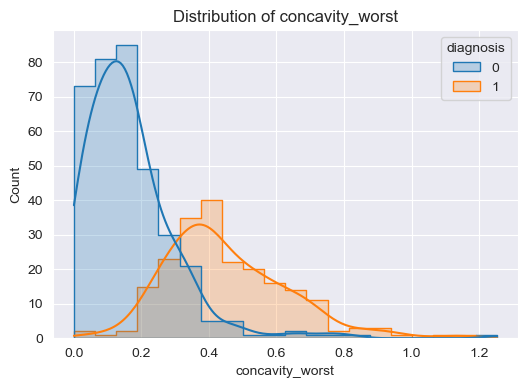

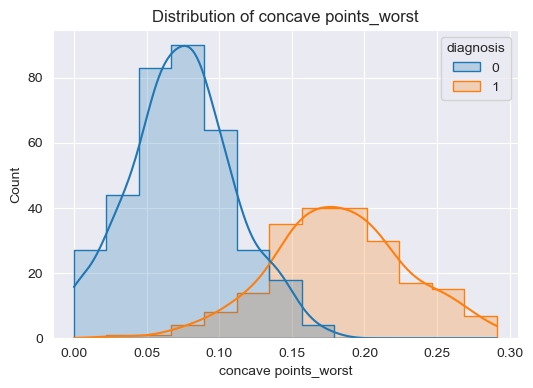

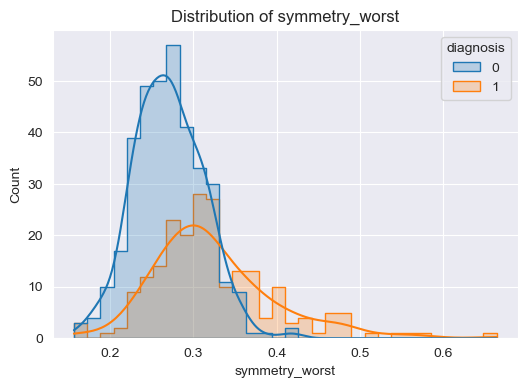

In [27]:
for column in data.columns[2:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=column, hue='diagnosis', kde=True, element='step')  # Replace 'target' with actual column name
    plt.title(f'Distribution of {column}')
    plt.show()

From the above plot, Many features such as area_mean, radius_mean, and perimeter_mean are right-skewed (i.e., long tail to the right). This indicates that most tumors are small/medium-sized, but a few large ones exist.

A right-skewed distribution (also called positively skewed) looks like this: Most of the data values are concentrated on the left side (lower values). The tail stretches out to the right, meaning a few data points have very high values. On a histogram, the peak is on the left and the bars gradually get smaller to the right.

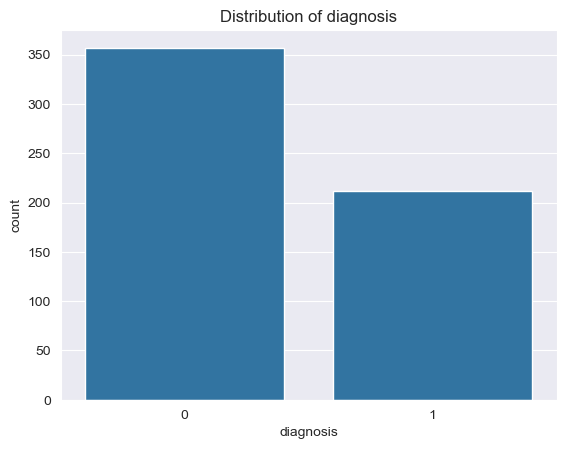

In [30]:
sns.countplot(x='diagnosis',data=data)
plt.title("Distribution of diagnosis")
plt.show()

There are more benign cases (label 0) than malignant cases (label 1).
Specifically, about 350 benign and 200 malignant cases.
The majority of people in the dataset are not suffering from cancer.
A smaller number of people are diagnosed with cancer.

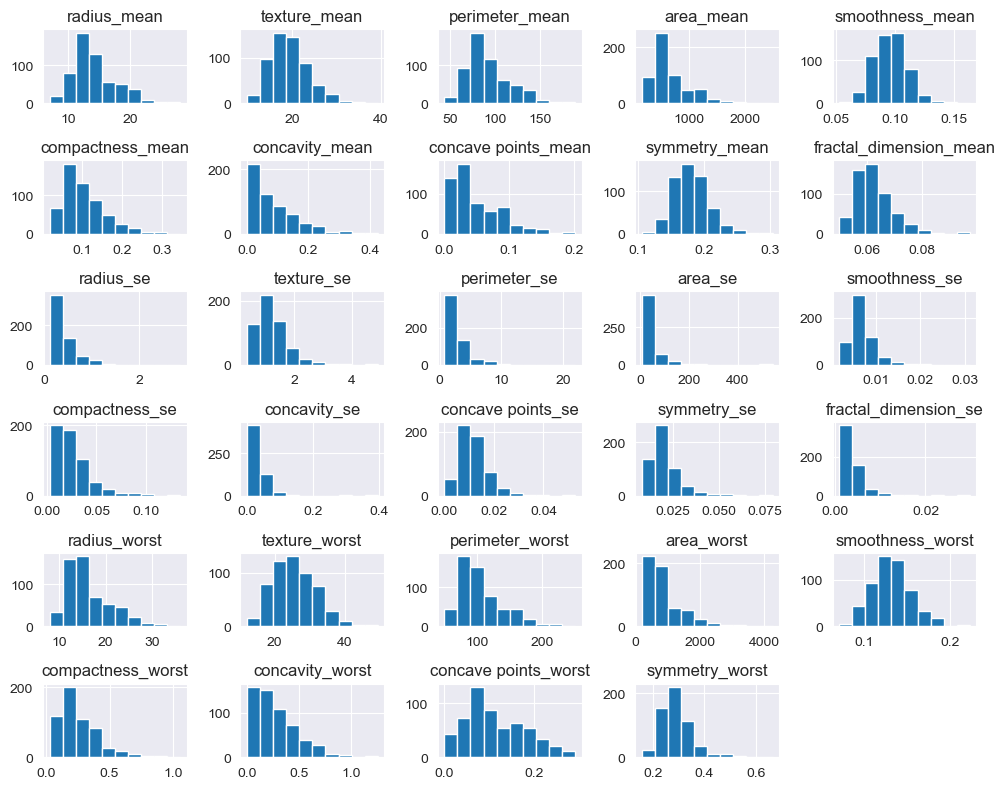

In [33]:
# Histograms for numerical features
data.iloc[:, 2:-1].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

The histograms show the distribution of various numerical features in the dataset, such as:
radius_mean, texture_mean, perimeter_mean, etc.

concavity_mean and concave points_mean appear to show bimodal distributions — suggesting the presence of two subgroups (likely benign vs. malignant tumors).

Features like concavity_mean and concave points_mean exhibit two peaks, which indicates potential for being highly discriminative features in classifying tumor types.

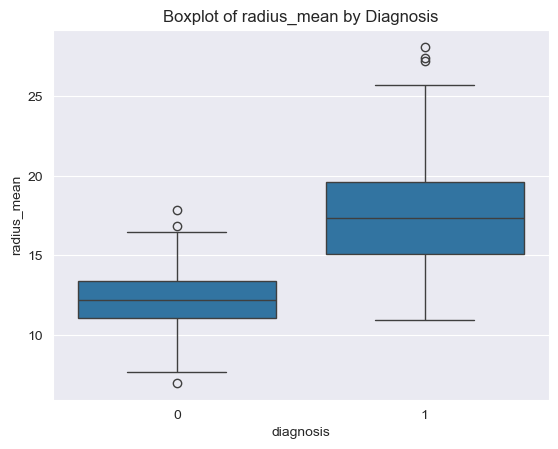

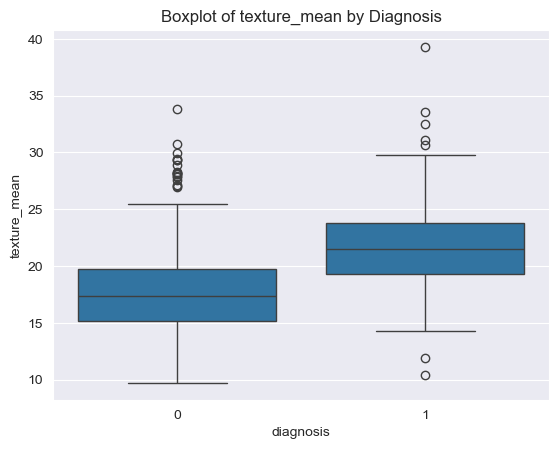

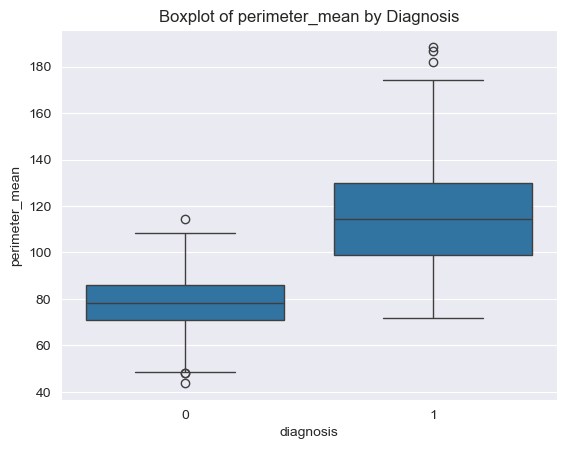

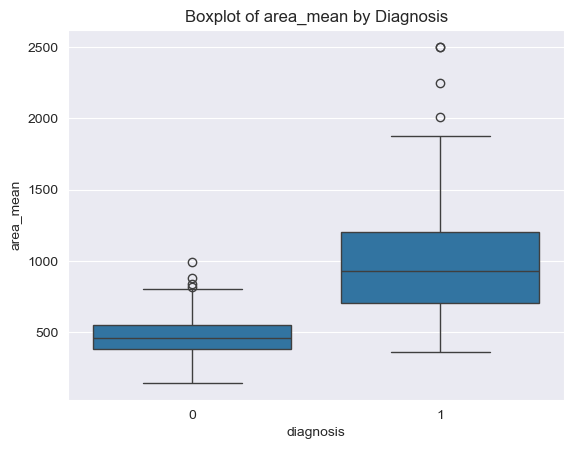

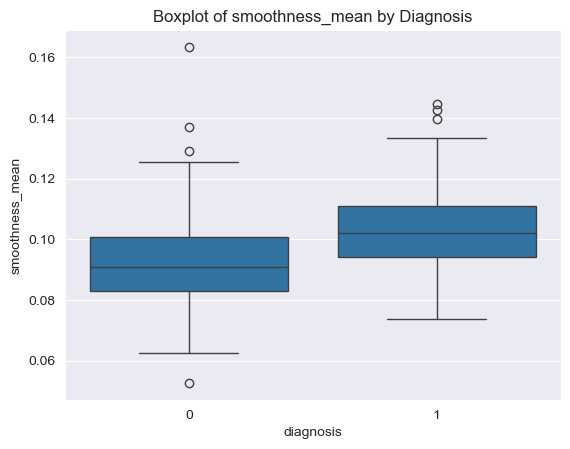

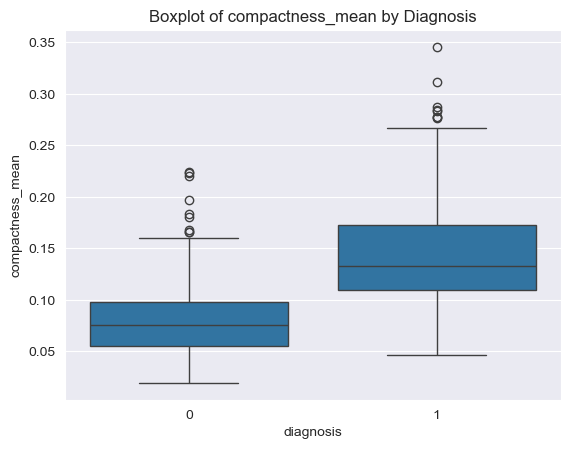

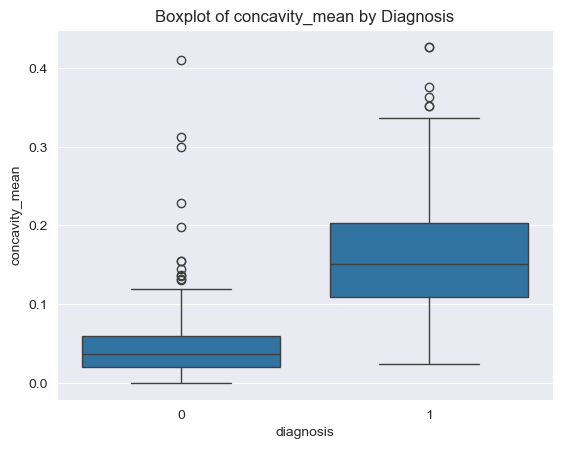

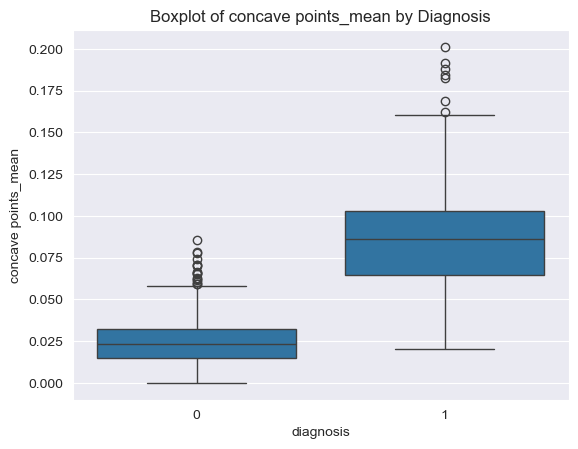

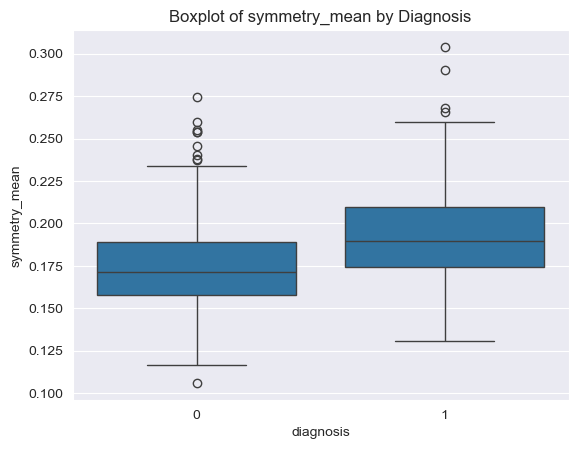

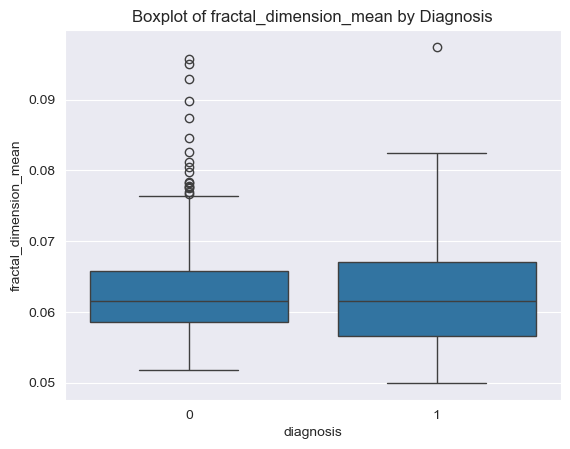

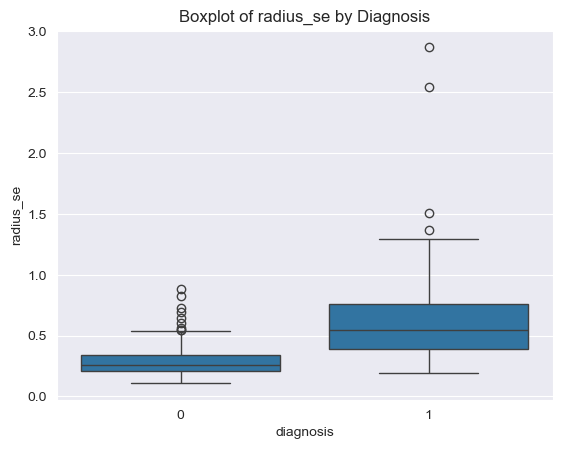

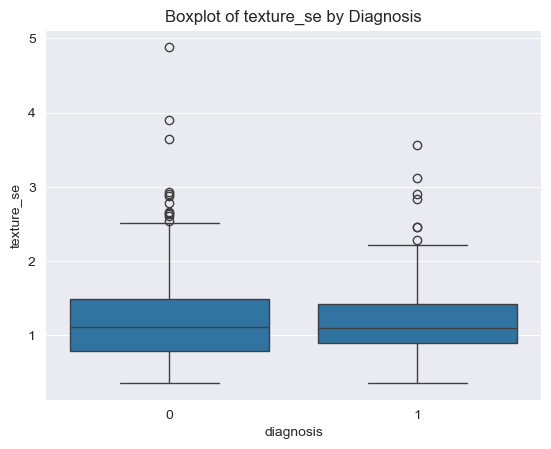

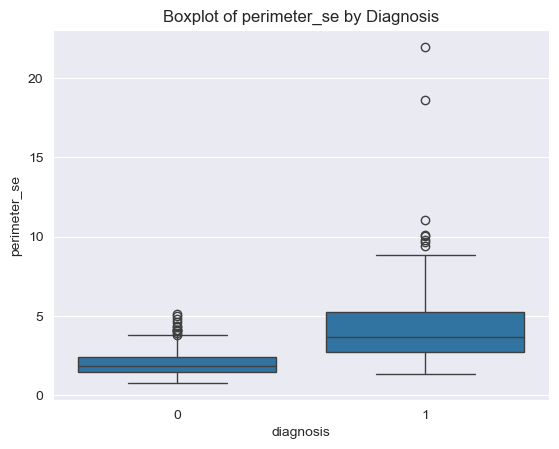

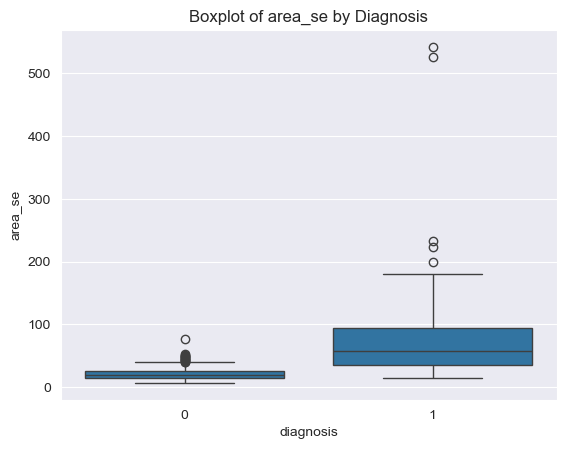

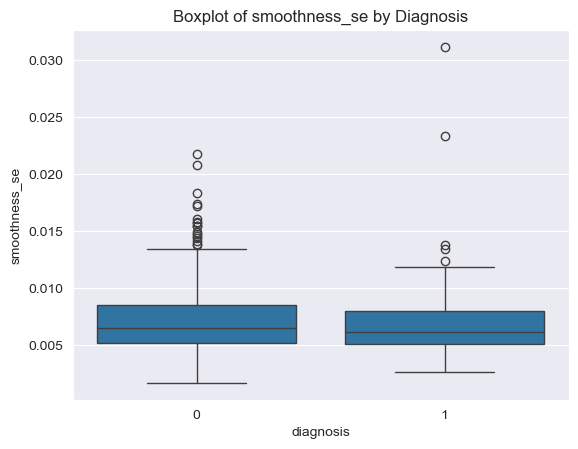

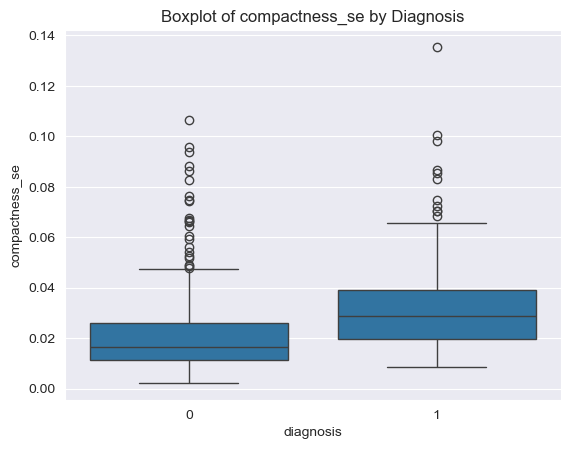

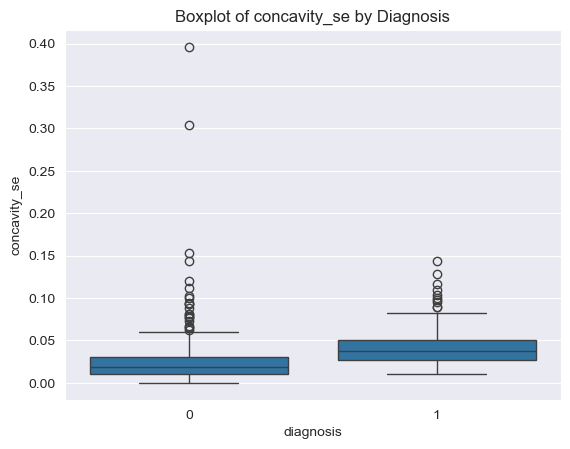

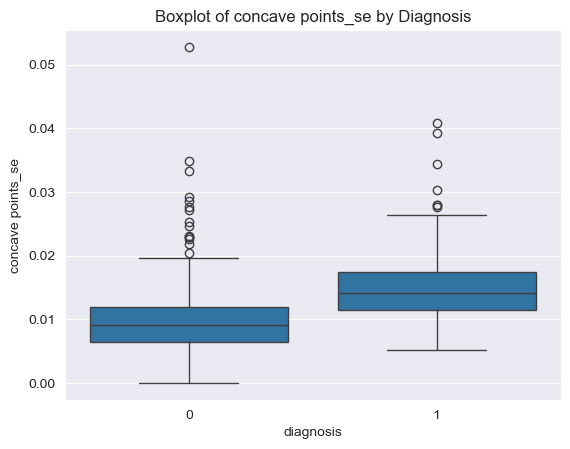

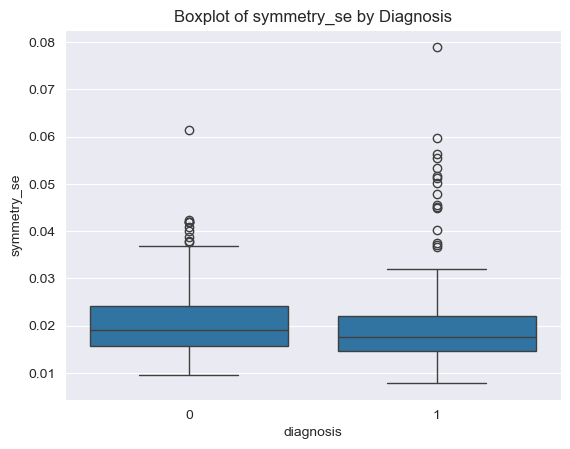

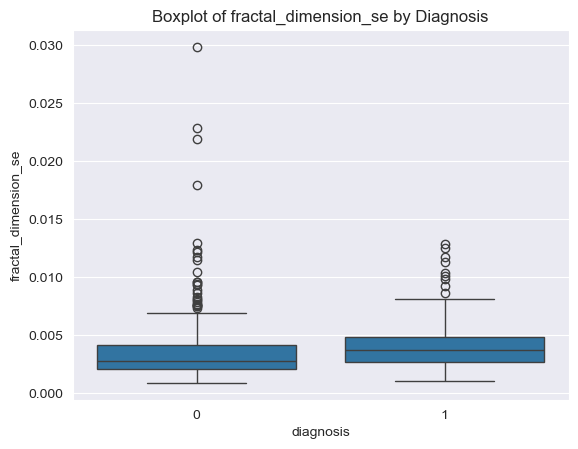

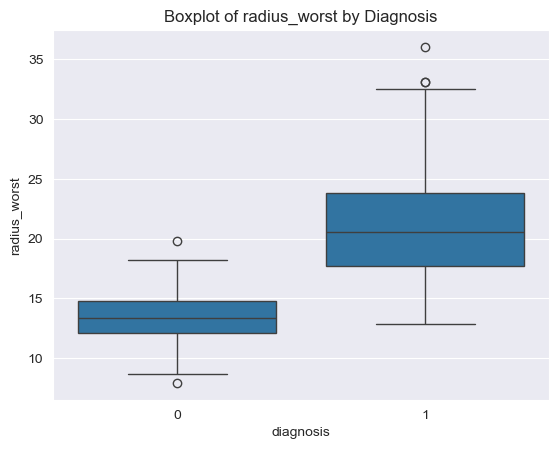

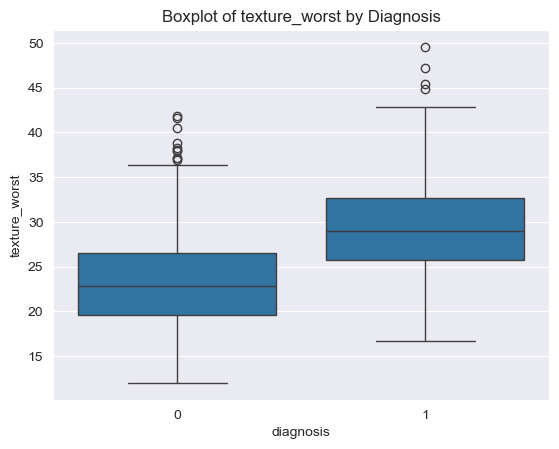

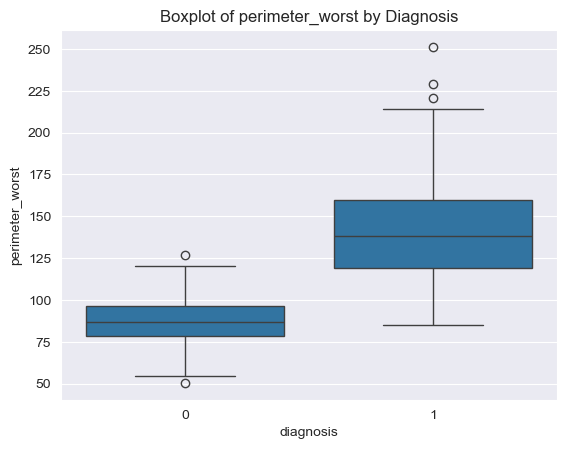

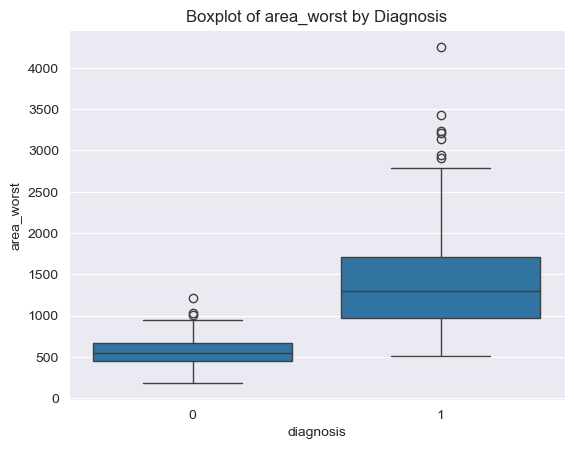

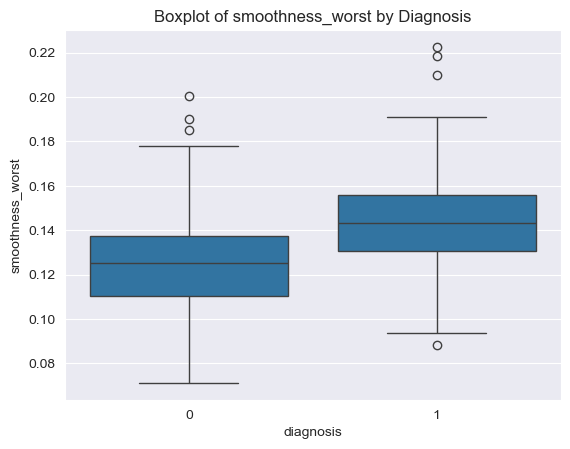

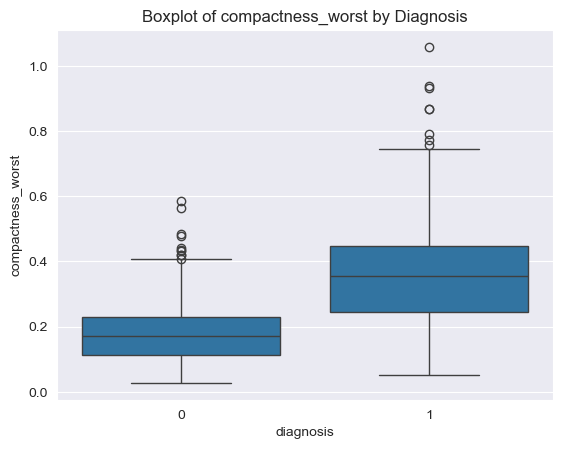

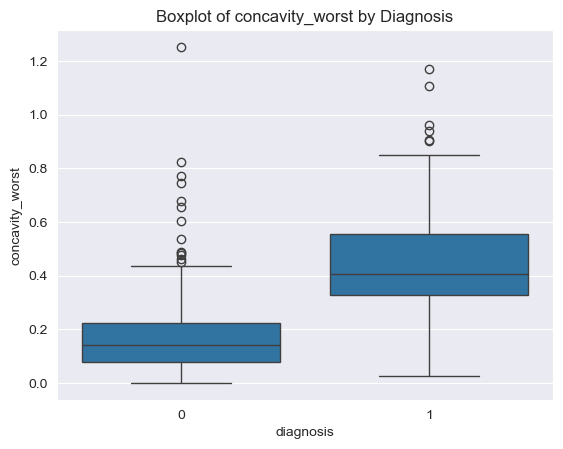

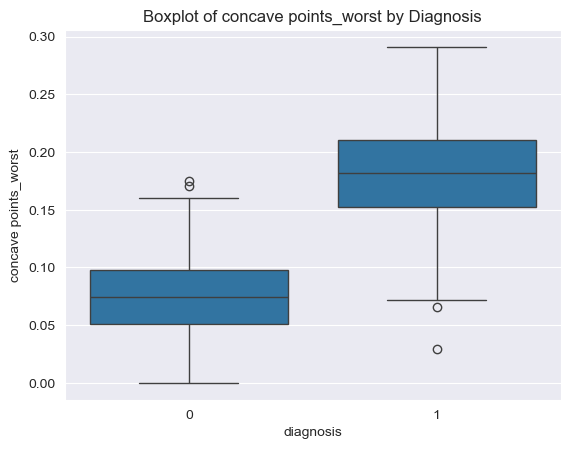

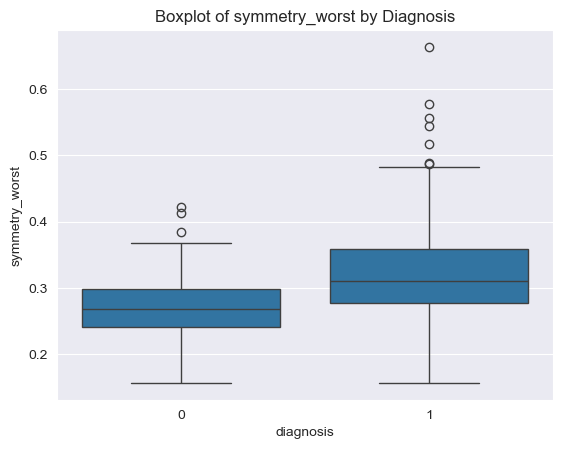

In [36]:
for column in data.columns[2:-1]:
    sns.boxplot(x='diagnosis',y=column,data=data)
    plt.title(f'Boxplot of {column} by Diagnosis')
    plt.show()

Some features (especially size-related ones like area_mean, radius_worst) show outliers, particularly in the malignant class.These extreme values may represent aggressive or advanced tumors. Some features (like smoothness_mean or fractal_dimension_se) may show significant overlap between benign and malignant cases.These features may not be useful on their own for classification but might contribute in combination with others. Based on visual separation in boxplots, the most discriminative features include: radius_mean,area_mean,perimeter_mean,concavity_mean,concave points_mean.These could be especially useful in building a classifier.

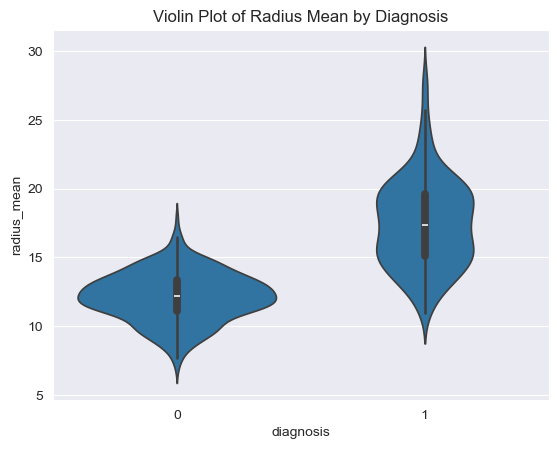

In [38]:
sns.violinplot(x='diagnosis', y='radius_mean', data=data)
plt.title("Violin Plot of Radius Mean by Diagnosis")
plt.show()

The image displays a violin plot comparing the distribution of "radius_mean" values for two different diagnosis categories, labeled as 0 and 1. The plot shows that the distribution for diagnosis 1 has a higher median and a wider range of values compared to diagnosis 0.


## splitting the data into training and testing

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [46]:
lr=LogisticRegression(max_iter=10000,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9626373626373627

In [48]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [50]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 0.9750
Recall: 0.9070
F1 Score: 0.9398
Confusion Matrix:
[[70  1]
 [ 4 39]]


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)

In [55]:
knc.fit(x_train,y_train)
knc.score(x_train,y_train)

C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9494505494505494

In [57]:
y_pred=knc.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [59]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9298
Precision: 0.9268
Recall: 0.8837
F1 Score: 0.9048
Confusion Matrix:
[[68  3]
 [ 5 38]]


# K=4

In [62]:
knc=KNeighborsClassifier(n_neighbors=4)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)

C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9406593406593406

In [64]:
y_pred=knc.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [66]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9474
Precision: 1.0000
Recall: 0.8605
F1 Score: 0.9250
Confusion Matrix:
[[71  0]
 [ 6 37]]


# K=5

In [69]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)

C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9406593406593406

In [71]:
y_pred=knc.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [73]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 1.0000
Recall: 0.8837
F1 Score: 0.9383
Confusion Matrix:
[[71  0]
 [ 5 38]]


# K=6

In [76]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)


C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9406593406593406

In [78]:
y_pred=knc.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [80]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 1.0000
Recall: 0.8837
F1 Score: 0.9383
Confusion Matrix:
[[71  0]
 [ 5 38]]


# K=7

In [83]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)


C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9406593406593406

In [85]:
y_pred=knc.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [87]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 1.0000
Recall: 0.8837
F1 Score: 0.9383
Confusion Matrix:
[[71  0]
 [ 5 38]]


# Navie Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)

C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9384615384615385

In [100]:
y_pred=gnb.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [102]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9070
F1 Score: 0.9512
Confusion Matrix:
[[71  0]
 [ 4 39]]


# SVM

In [105]:
from sklearn.svm import SVC
reg=SVC()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9142857142857143

In [107]:
y_pred=reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [109]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9474
Precision: 1.0000
Recall: 0.8605
F1 Score: 0.9250
Confusion Matrix:
[[71  0]
 [ 6 37]]


# Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

DecisionTreeClassifier()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [114]:
clf.score(x_train,y_train)

1.0

In [116]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [118]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9386
Precision: 0.9091
Recall: 0.9302
F1 Score: 0.9195
Confusion Matrix:
[[67  4]
 [ 3 40]]


# Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=23)
rf.fit(x_train, y_train)

C:\Users\vasav\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=23)

RandomForestClassifier(random_state=23)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [123]:
rf.score(x_train,y_train)

1.0

In [125]:
y_pred=rf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [127]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
Confusion Matrix:
[[70  1]
 [ 3 40]]


C:\Users\vasav\AppData\Local\Temp\ipykernel_19336\1556985426.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis',legend=False)


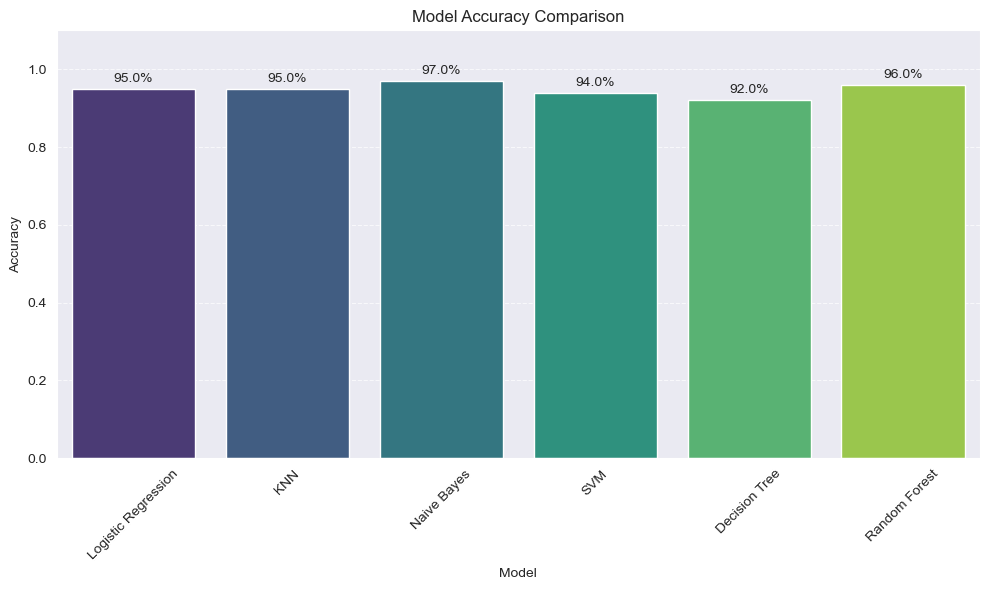

In [137]:
d = {
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.95, 0.95, 0.97, 0.94, 0.92, 0.96]
}

df = pd.DataFrame(d)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis',legend=False)

# Add percentage labels on top of each bar
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,  # slightly above the bar
        f'{height * 100:.1f}%',  # format as percentage
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # increased limit to accommodate text
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The image shows a bar plot comparing the accuracy scores of various machine learning models. The models are listed on the x-axis, and their corresponding accuracy scores are represented by bars of different colors. The y-axis represents the accuracy scores, ranging from 0 to 100%. 

The plot provides a visual representation of the performance of each model, allowing for easy comparison and identification of the most accurate models. The description below the plot explains that the models were evaluated using a common test dataset after training, and that Naive Bayes achieved the highest accuracy score of 97%, followed closely by Random Forest with an accuracy score of 96%. Logistic Regression and KNN both achieved an accuracy score of 95%, while SVM and Decision Tree had lower accuracy scores of 94% and 92%, respectively.
